In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
stocks_prices = pd.read_csv('stocks_prices.csv', index_col=0, parse_dates=True)
stocks_prices.head()

,AAPL,MSFT,NVDA,AMZN,META,GOOGL,BRK-B,GOOG,LLY,JPM,...,NCLH,IVZ,RL,BIO,WBA,BBWI,ETSY,BEN,PARA,NWS
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,37.750092,95.501320,3.378612,76.956497,135.401764,52.603748,202.800003,52.164391,105.469978,83.855179,...,42.380001,12.701214,93.995438,228.080002,51.674095,18.607630,47.000000,23.455463,39.494125,10.888426
2019-01-03,33.989895,91.988007,3.174486,75.014000,131.469833,51.146851,191.660004,50.678543,102.192383,82.663452,...,40.709999,12.391978,89.752106,224.300003,51.134872,18.713720,46.029999,23.023285,39.900665,10.747748
2019-01-04,35.440903,96.266312,3.377868,78.769501,137.667099,53.770355,195.199997,53.404346,105.267982,85.710892,...,43.029999,13.017986,93.416000,226.279999,52.836067,19.597778,49.700001,23.777634,40.800217,11.216675
2019-01-07,35.362019,96.389084,3.556695,81.475502,137.766907,53.663124,196.910004,53.288631,105.837204,85.770454,...,43.709999,13.176376,95.118683,233.669998,53.139854,20.418179,51.570000,23.895500,41.232708,11.441757
2019-01-08,36.036125,97.087975,3.468149,82.829002,142.237717,54.134457,196.309998,53.682163,106.810364,85.608749,...,45.029999,13.033074,96.571754,235.529999,54.203102,19.944330,53.880001,24.036940,41.838177,11.554298


In [5]:
stocks_tbl = pd.read_csv('stocks_tbl.csv', index_col=0, parse_dates=True)
stocks_tbl.head()

C:\Users\jaayg\AppData\Local\Temp\ipykernel_8112\3005282296.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stocks_tbl = pd.read_csv('stocks_tbl.csv', index_col=0, parse_dates=True)


,company,identifier,sedol,weight,sector,shares_held,local_currency,group
symbol,,,,,,,,
AAPL,APPLE INC,037833100,2046251,0.069153,-,171767010,USD,0
MSFT,MICROSOFT CORP,594918104,2588173,0.065489,-,88569779,USD,0
NVDA,NVIDIA CORP,67066G104,2379504,0.056877,-,293126746,USD,0
AMZN,AMAZON.COM INC,023135106,2000019,0.034872,-,109092981,USD,0
META,META PLATFORMS INC CLASS A,30303M102,B7TL820,0.024036,-,26127829,USD,0


In [7]:
stocks_prices.shape

(1426, 487)

In [15]:
q = (1000 / len(stocks_tbl)) / stocks_prices.iloc[0, 1:]
q0 = q.to_numpy().reshape(-1, 1)
stocks_prices0 = stocks_prices.iloc[:, 1:].to_numpy()
v1000_0 = stocks_prices0 @ q0

In [17]:
print(stocks_prices.columns)

Index(['AAPL', 'MSFT', 'NVDA', 'AMZN', 'META', 'GOOGL', 'BRK-B', 'GOOG', 'LLY',
       'JPM',
       ...
       'NCLH', 'IVZ', 'RL', 'BIO', 'WBA', 'BBWI', 'ETSY', 'BEN', 'PARA',
       'NWS'],
      dtype='object', length=487)


In [18]:
dates = pd.to_datetime(stocks_prices.index)

In [19]:
v1000_0_ts = pd.Series(
    v1000_0.flatten(),
    index=dates
)

In [21]:
date_start = str(stocks_prices.index[0])

In [24]:
df_port_SP500 = pd.DataFrame({
    "date": stocks_prices.index,
    "value": v1000_0_ts.values,
    "portfolio": "Equal Weight SP500"
})

In [23]:
df_port_SP500

,date,v1000_0,portfolio
0,2019-01-02,997.946612,Equal Weight SP500
1,2019-01-03,977.952383,Equal Weight SP500
2,2019-01-04,1010.094492,Equal Weight SP500
3,2019-01-07,1020.007834,Equal Weight SP500
4,2019-01-08,1031.153040,Equal Weight SP500
...,...,...,...
1421,2024-08-26,2617.696536,Equal Weight SP500
1422,2024-08-27,2618.348819,Equal Weight SP500
1423,2024-08-28,2593.586773,Equal Weight SP500
1424,2024-08-29,2597.128882,Equal Weight SP500


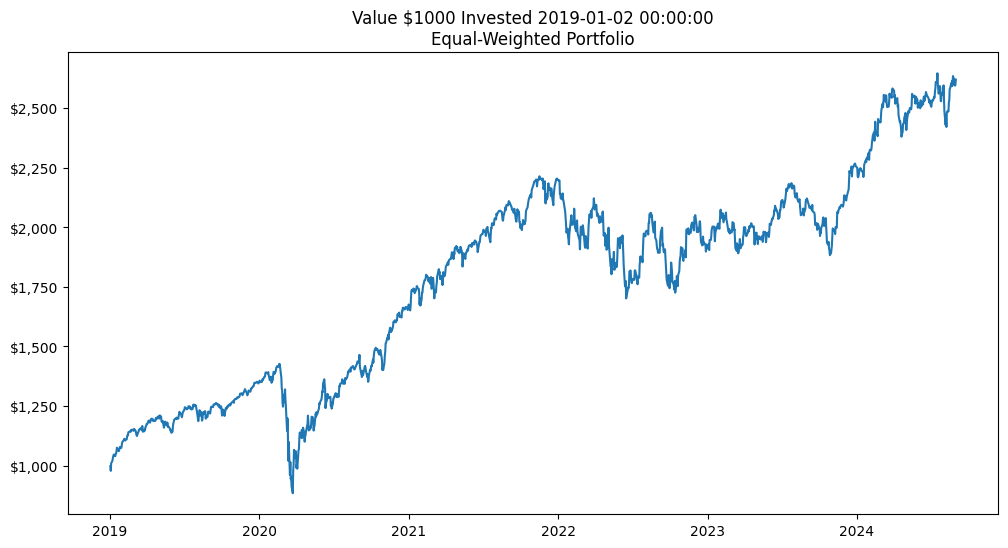

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df_port_SP500["date"], df_port_SP500["value"])
plt.title(f"Value $1000 Invested {date_start}\nEqual-Weighted Portfolio")
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x:,.0f}")
)
plt.show()

In [28]:
list_AANG = ["AMZN", "AAPL", "NFLX", "GOOG"]

index_AANG = [
    stocks_prices.columns.get_loc(ticker)
    for ticker in list_AANG
    if ticker in stocks_prices.columns
]

In [29]:
# vector de ceros del mismo tamaño
q_AANG = 0 * q

# precio inicial de AAPL
stocks_prices.loc[stocks_prices.index[0], "AAPL"]

np.float64(37.7500915527344)

In [30]:
for symbol in list_AANG:
    print(symbol)
    
    q_symbol = (1000 / len(index_AANG)) / stocks_prices.loc[
        stocks_prices.index[0], symbol
    ]
    
    print(q_symbol)
    
    q_AANG[symbol] = q_symbol


AMZN
3.2485886068206486
AAPL
6.622500495151551
NFLX
0.9340207598427639
GOOG
4.7925413734767215


In [31]:
# Vector columna (N x 1)
q_AANG_0 = q_AANG.to_numpy().reshape(-1, 1)

# Matriz de precios (T x N)
stocks_prices0 = stocks_prices.to_numpy()

# Valor del portafolio AANG (T x 1)
v1000_AANG_0 = stocks_prices0 @ q_AANG_0


In [32]:
df_port_AANG = pd.DataFrame({
    "date": stocks_prices.index,
    "value": v1000_AANG_0.flatten(),
    "portfolio": "Equal-Weighted AANG"
})
df_port_all = pd.concat(
    [df_port_SP500, df_port_AANG],
    axis=0,
    ignore_index=True
)


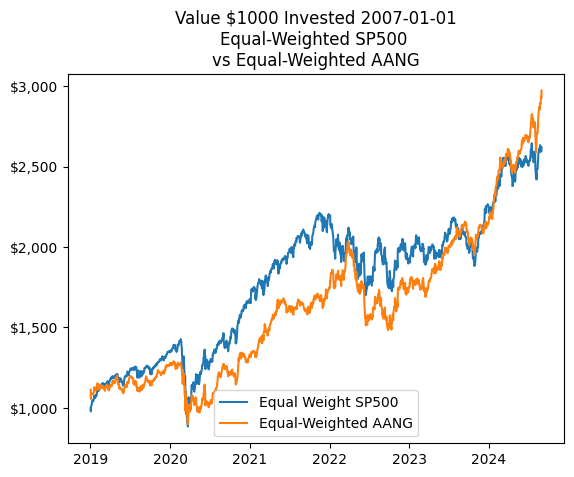

In [42]:
plt.figure()

for name, g in df_port_all.groupby("portfolio"):
    plt.plot(g["date"], g["value"], label=name)

plt.title(
    "Value $1000 Invested 2007-01-01\n"
    "Equal-Weighted SP500 \nvs Equal-Weighted AANG"
)

plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x:,.0f}")
)

plt.legend(loc="lower center")
plt.show()

In [40]:
# Vector de cantidades, alineado por nombre
q_AANG = pd.Series(0.0, index=stocks_prices.columns)

capital_per_stock = 1000 / len(list_AANG)

for symbol in list_AANG:
    q_AANG[symbol] = (
        capital_per_stock /
        stocks_prices.loc[stocks_prices.index[0], symbol]
    )

In [41]:
values_initial = q_AANG * stocks_prices.iloc[0]
values_initial[values_initial != 0]

AAPL    250.0
AMZN    250.0
GOOG    250.0
NFLX    250.0
dtype: float64

In [43]:
# Último día
values_final = q_AANG * stocks_prices.iloc[-1]

# Solo las posiciones AANG
values_final[values_final != 0]



AAPL    1516.552613
AMZN     579.873066
GOOG     790.256258
NFLX     655.075437
dtype: float64

In [44]:
df_all = (
    stocks_prices[list_AANG]
    .multiply(q_AANG[list_AANG], axis=1)
    .reset_index()
    .melt(id_vars="date", var_name="symbol", value_name="Value")
)

df_all.tail()


,date,symbol,Value
5699,2024-08-26,GOOG,803.753416
5700,2024-08-27,GOOG,796.334762
5701,2024-08-28,GOOG,787.336607
5702,2024-08-29,GOOG,782.071730
5703,2024-08-30,GOOG,790.256258


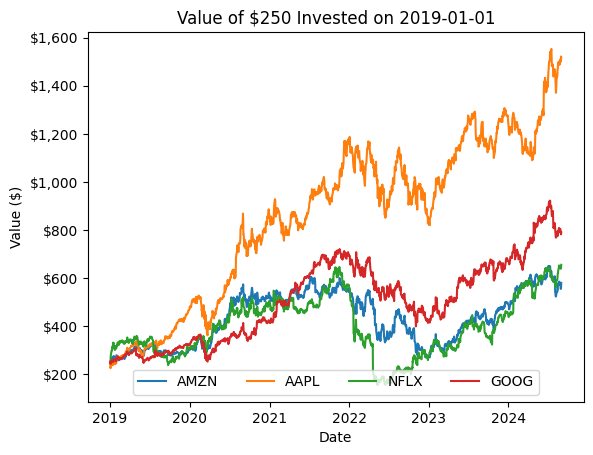

In [54]:
import matplotlib.ticker as mtick
plt.figure()

for symbol in list_AANG:
    subset = df_all[df_all["symbol"] == symbol]
    plt.plot(subset["date"], subset["Value"], label=symbol)

plt.title("Value of $250 Invested on 2019-01-01")
plt.xlabel("Date")
plt.ylabel("Value ($)")
plt.legend(loc="lower center", ncol=4)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.savefig('aang_individual_stocks.png')
plt.show()


In [48]:
prices = stocks_prices[list_AANG].copy()

returns = prices.pct_change().dropna()


In [49]:
def rebalance_portfolio(prices, rebalance_freq=None, initial_capital=1000):
    """
    prices: DataFrame (dates x assets)
    rebalance_freq: None, 'D', 'W', 'M', '6M'
    """
    n_assets = prices.shape[1]
    weights = pd.Series(1 / n_assets, index=prices.columns)

    # fechas de rebalanceo
    if rebalance_freq is None:
        rebalance_dates = []
    else:
        rebalance_dates = (
            prices
            .resample(rebalance_freq)
            .first()
            .index
        )

    shares = (initial_capital * weights) / prices.iloc[0]
    portfolio_value = []

    for date, price in prices.iterrows():
        value = (shares * price).sum()
        portfolio_value.append(value)

        if date in rebalance_dates:
            shares = (value * weights) / price

    return pd.Series(portfolio_value, index=prices.index)


In [50]:
portfolios = pd.DataFrame({
    "No Rebalance": rebalance_portfolio(prices, None),
    "Daily": rebalance_portfolio(prices, 'D'),
    "Weekly": rebalance_portfolio(prices, 'W'),
    "Monthly": rebalance_portfolio(prices, 'M'),
    "6M": rebalance_portfolio(prices, '6M'),
})


C:\Users\jaayg\AppData\Local\Temp\ipykernel_8112\2376708911.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(rebalance_freq)


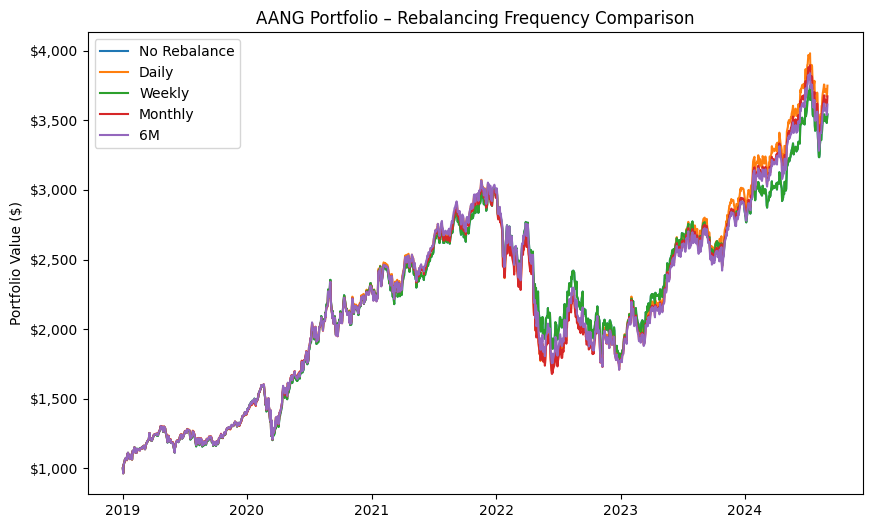

In [53]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(10,6))

for col in portfolios.columns:
    plt.plot(portfolios.index, portfolios[col], label=col)

plt.title("AANG Portfolio – Rebalancing Frequency Comparison")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.savefig('aang_rebalancing_comparison.png')
plt.show()


In [52]:
def performance_metrics(series):
    returns = series.pct_change().dropna()
    total_return = series.iloc[-1] / series.iloc[0] - 1
    cagr = (series.iloc[-1] / series.iloc[0]) ** (252/len(series)) - 1
    vol = returns.std() * (252 ** 0.5)
    sharpe = cagr / vol

    return pd.Series({
        "Total Return": total_return,
        "CAGR": cagr,
        "Volatility": vol,
        "Sharpe": sharpe
    })

metrics = portfolios.apply(performance_metrics)
metrics


,No Rebalance,Daily,Weekly,Monthly,6M
Total Return,2.541757,2.748369,2.541757,2.671664,2.612644
CAGR,0.250423,0.263014,0.250423,0.258408,0.254809
Volatility,0.277609,0.288511,0.277609,0.287045,0.284682
Sharpe,0.902071,0.911628,0.902071,0.900234,0.895067
